<h1 align="center"><font size="5">Gaussian classifier with Python</font></h1>

<h2 align="center"><font size="4">Classifier to predict if a patient will have diabetes or not</font></h2>

Import libraries

In [1]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
%matplotlib inline 
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import itertools
from sklearn import metrics

First, we download the Pima Indians Diabetes dataset from https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database. Load the dataset as a numpy array, and we fix the outcome column corresponds to the class label, the other columns to input features.

In [2]:
diab_df = pd.read_csv("diabetes.csv")
diab_df[0:5]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
diab_df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [4]:
X = np.asarray(diab_df[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']])
X[0:5]

array([[6.000e+00, 1.480e+02, 7.200e+01, 3.500e+01, 0.000e+00, 3.360e+01,
        6.270e-01, 5.000e+01],
       [1.000e+00, 8.500e+01, 6.600e+01, 2.900e+01, 0.000e+00, 2.660e+01,
        3.510e-01, 3.100e+01],
       [8.000e+00, 1.830e+02, 6.400e+01, 0.000e+00, 0.000e+00, 2.330e+01,
        6.720e-01, 3.200e+01],
       [1.000e+00, 8.900e+01, 6.600e+01, 2.300e+01, 9.400e+01, 2.810e+01,
        1.670e-01, 2.100e+01],
       [0.000e+00, 1.370e+02, 4.000e+01, 3.500e+01, 1.680e+02, 4.310e+01,
        2.288e+00, 3.300e+01]])

In [5]:
y = np.asarray(diab_df['Outcome'])
y [0:5]

array([1, 0, 1, 0, 1])

Now, we split the dataset in training and validation:

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=42)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (514, 8) (514,)
Test set: (254, 8) (254,)


For each one of the 8 input features we built an univariate Gaussian classifier estimating
the parameters using the training dataset and evaluating the classifier in the validation
dataset. 

In [7]:
from scipy.stats import multivariate_normal

In [8]:
class GaussianClassifier_UV:
    '''Multivariate Gaussian Classifier'''
    
    def train(self,X,y):
        
        #class prior
        self.pi_0 = y[y==0].shape[0]/y.shape[0]
        self.pi_1 = 1 - self.pi_0
        
        #class 0 parameters
        self.mean_0 = np.average(X[y==0], axis = 0)
        self.sigma_0 = np.cov(X[y==0], rowvar = False)
        
        #class 1 parameters
        self.mean_1 = np.average(X[y==1], axis = 0)
        self.sigma_1 = np.cov(X[y==1], rowvar = False)
        
        #multivariate class-conditional density function
        self.prob_0 = multivariate_normal(self.mean_0, self.sigma_0, allow_singular = True)
        self.prob_1 = multivariate_normal(self.mean_1, self.sigma_1, allow_singular = True)
        
        print('Mean-parameters: mean_0 = {} \t mean_1 = {}'.format(self.mean_0, self.mean_1))
        print('Sigma-parameters: sigma_0 = {} \t sigma_1 = {}'.format(self.sigma_0[0][0], self.sigma_1[0][0]))
        
    def predict(self,X):
        preds = []
        for x in X:
            if (self.prob_0.pdf(x)*self.pi_0 > self.prob_1.pdf(x)*self.pi_1):
                preds.append(0)
            else:
                preds.append(1)
        return np.array(preds)
    
    def posterior_distribution(self,X):
        distri_0 = []
        distri_1 = []
        for x in X:
            post_0 = (self.prob_0.pdf(x)*self.pi_0)/((self.prob_0.pdf(x)*self.pi_0 + self.prob_1.pdf(x)*self.pi_1))
            distri_0.append(post_0)
            post_1 = (self.prob_1.pdf(x)*self.pi_1)/((self.prob_0.pdf(x)*self.pi_0 + self.prob_1.pdf(x)*self.pi_1))
            distri_1.append(post_1)
        plt.scatter(X, distri_0 , color = 'b')
        plt.scatter(X, distri_1 , color = 'r')

In [9]:
clf = GaussianClassifier_UV()

For each classifier write down the parameters. Report accuracy, precision and recall. 

In [10]:
for i in range(X_train.shape[1]):
    print('Feature {}'.format(i))
    clf.train(X_train[:,i],y_train)
    yhat = clf.predict(X_test[:,i])
    print (classification_report(y_test, yhat))

Feature 0
Mean-parameters: mean_0 = 3.3042168674698793 	 mean_1 = 4.653846153846154
Sigma-parameters: sigma_0 = 9.009891529865687 	 sigma_1 = 12.78006799830004
              precision    recall  f1-score   support

           0       0.72      0.89      0.80       168
           1       0.60      0.34      0.43        86

    accuracy                           0.70       254
   macro avg       0.66      0.61      0.61       254
weighted avg       0.68      0.70      0.67       254

Feature 1
Mean-parameters: mean_0 = 109.73493975903614 	 mean_1 = 142.3846153846154
Sigma-parameters: sigma_0 = 636.8419175190186 	 sigma_1 = 1110.7131321716952
              precision    recall  f1-score   support

           0       0.75      0.86      0.80       168
           1       0.62      0.44      0.52        86

    accuracy                           0.72       254
   macro avg       0.69      0.65      0.66       254
weighted avg       0.71      0.72      0.71       254

Feature 2
Mean-parameters

Which classifier is the best? For this classifier draw the curves for the posterior
distribution for each class and show where the decision boundary is.

In [11]:
#Feature 1 - Best univariate classifier

clf.train(X_train[:,1],y_train)
yhat = clf.predict(X_test[:,1])
print (classification_report(y_test, yhat))

Mean-parameters: mean_0 = 109.73493975903614 	 mean_1 = 142.3846153846154
Sigma-parameters: sigma_0 = 636.8419175190186 	 sigma_1 = 1110.7131321716952
              precision    recall  f1-score   support

           0       0.75      0.86      0.80       168
           1       0.62      0.44      0.52        86

    accuracy                           0.72       254
   macro avg       0.69      0.65      0.66       254
weighted avg       0.71      0.72      0.71       254



Classifier with $\textbf{Feature 1: Glucose}$ is the best classifier because it has the maximum value for recall of outcome 1. This means: the predictions made with this predictor have the high True Positives rate in comparing with the other 8 predictors. In this context, for the health of patientes is better have more TruePositives and some FalsePositives than more TrueNegatives but more FalseNegatives.

In [12]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[ 38  48]
 [ 23 145]]


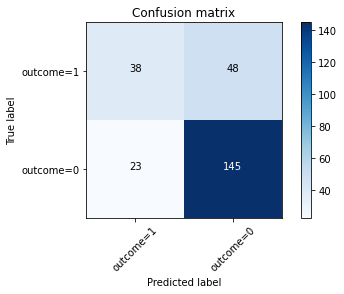

In [13]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['outcome=1','outcome=0'],normalize= False,  title='Confusion matrix')

For this classifier draw the curves for the posterior distribution for each class and show where the decision boundary is.

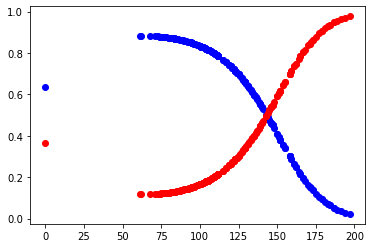

In [14]:
clf.posterior_distribution(X_test[:,1])

In the following code lines, we modify the GaussianClassifier_UV and set it to be bivariate:

In [15]:
for i in range(X_train.shape[1]):
    for j in range(X_train.shape[1]):
        print('Feature 1: {} \t Feature 2: {}'.format(i,j))
        clf.train(X_train[:,[i,j]],y_train)
        yhat = clf.predict(X_test[:,[i,j]])
        print(classification_report(y_test, yhat))

Feature 1: 0 	 Feature 2: 0
Mean-parameters: mean_0 = [3.3 3.3] 	 mean_1 = [4.65 4.65]
Sigma-parameters: sigma_0 = 9.009891529865687 	 sigma_1 = 12.780067998300044
              precision    recall  f1-score   support

           0       0.72      0.89      0.80       168
           1       0.60      0.34      0.43        86

    accuracy                           0.70       254
   macro avg       0.66      0.61      0.61       254
weighted avg       0.68      0.70      0.67       254

Feature 1: 0 	 Feature 2: 1
Mean-parameters: mean_0 = [  3.3  109.73] 	 mean_1 = [  4.65 142.38]
Sigma-parameters: sigma_0 = 9.009891529865687 	 sigma_1 = 12.780067998300044
              precision    recall  f1-score   support

           0       0.78      0.85      0.81       168
           1       0.64      0.55      0.59        86

    accuracy                           0.74       254
   macro avg       0.71      0.70      0.70       254
weighted avg       0.74      0.74      0.74       254

Feature 

              precision    recall  f1-score   support

           0       0.76      0.86      0.81       168
           1       0.63      0.47      0.54        86

    accuracy                           0.73       254
   macro avg       0.70      0.66      0.67       254
weighted avg       0.72      0.73      0.72       254

Feature 1: 2 	 Feature 2: 2
Mean-parameters: mean_0 = [68.38 68.38] 	 mean_1 = [72.91 72.91]
Sigma-parameters: sigma_0 = 314.5209023404798 	 sigma_1 = 330.72603363487343
              precision    recall  f1-score   support

           0       0.66      0.99      0.79       168
           1       0.50      0.02      0.04        86

    accuracy                           0.66       254
   macro avg       0.58      0.51      0.42       254
weighted avg       0.61      0.66      0.54       254

Feature 1: 2 	 Feature 2: 3
Mean-parameters: mean_0 = [68.38 19.82] 	 mean_1 = [72.91 21.81]
Sigma-parameters: sigma_0 = 314.5209023404798 	 sigma_1 = 330.72603363487343
      

              precision    recall  f1-score   support

           0       0.68      0.92      0.78       168
           1       0.52      0.17      0.26        86

    accuracy                           0.67       254
   macro avg       0.60      0.55      0.52       254
weighted avg       0.63      0.67      0.61       254

Feature 1: 4 	 Feature 2: 4
Mean-parameters: mean_0 = [67.21 67.21] 	 mean_1 = [101.17 101.17]
Sigma-parameters: sigma_0 = 8960.706393550032 	 sigma_1 = 20767.45701536033
              precision    recall  f1-score   support

           0       0.68      0.92      0.78       168
           1       0.50      0.16      0.25        86

    accuracy                           0.66       254
   macro avg       0.59      0.54      0.51       254
weighted avg       0.62      0.66      0.60       254

Feature 1: 4 	 Feature 2: 5
Mean-parameters: mean_0 = [67.21 30.14] 	 mean_1 = [101.17  35.31]
Sigma-parameters: sigma_0 = 8960.706393550032 	 sigma_1 = 20767.45701536033
    

              precision    recall  f1-score   support

           0       0.71      0.90      0.80       168
           1       0.61      0.29      0.39        86

    accuracy                           0.70       254
   macro avg       0.66      0.60      0.60       254
weighted avg       0.68      0.70      0.66       254

Feature 1: 6 	 Feature 2: 6
Mean-parameters: mean_0 = [0.43 0.43] 	 mean_1 = [0.54 0.54]
Sigma-parameters: sigma_0 = 0.09672023793360755 	 sigma_1 = 0.14708364000364274
              precision    recall  f1-score   support

           0       0.69      0.96      0.80       168
           1       0.68      0.15      0.25        86

    accuracy                           0.69       254
   macro avg       0.69      0.56      0.53       254
weighted avg       0.69      0.69      0.62       254

Feature 1: 6 	 Feature 2: 7
Mean-parameters: mean_0 = [ 0.43 30.74] 	 mean_1 = [ 0.54 37.65]
Sigma-parameters: sigma_0 = 0.09672023793360755 	 sigma_1 = 0.14708364000364274
    

We found the parameters with the best recall are $\textbf{Glucose}$ and $\textbf{BMI}$, so, those are the parameters for the best Gaussian Classifier.

In [16]:
# Feature 1-5
clf.train(X_train[:,[1,5]],y_train)
yhat = clf.predict(X_test[:,[1,5]])
print (classification_report(y_test, yhat))

Mean-parameters: mean_0 = [109.73  30.14] 	 mean_1 = [142.38  35.31]
Sigma-parameters: sigma_0 = 636.8419175190186 	 sigma_1 = 1110.7131321716956
              precision    recall  f1-score   support

           0       0.79      0.86      0.82       168
           1       0.66      0.55      0.60        86

    accuracy                           0.75       254
   macro avg       0.72      0.70      0.71       254
weighted avg       0.74      0.75      0.75       254



Confusion matrix, without normalization
[[ 47  39]
 [ 24 144]]


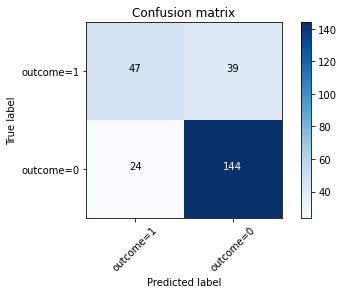

In [17]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['outcome=1','outcome=0'],normalize= False,  title='Confusion matrix')

Now, we plot a ROC curve to compare results from Univariate Gaussian Classifier and Bivariate Gaussian Classifier.

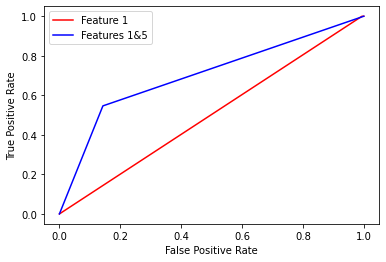

In [18]:
fpr1, tpr1, thresholds1 = metrics.roc_curve(y_test, clf.predict(X_test[:,1]), pos_label=1)
fpr2, tpr2, thresholds2 = metrics.roc_curve(y_test, clf.predict(X_test[:,[1,5]]), pos_label=1)

plt.plot(fpr1,tpr1, color = 'r')
plt.plot(fpr2,tpr2, color = 'b')
plt.legend(['Feature 1', 'Features 1&5'])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

The next step is plotting the decision regions and decision boundary building the plot:

In [19]:
def listOfTuples(l1, l2): 
    lista = list(map(lambda x, y:[x,y], l1, l2)) 
    return np.array(lista)

In [20]:
def plot_decision_region(X, n = 100):
    """
    X: corresponde a las instancias de nuestro conjunto de datos
    pred_fun: es una función que para cada valor de X, me regresa una predicción
    """
    min_x = np.min(X[:, 0])
    max_x = np.max(X[:, 0])
    min_y = np.min(X[:, 1])
    max_y = np.max(X[:, 1])
    min_x = min_x - (max_x - min_x) * 0.05
    max_x = max_x + (max_x - min_x) * 0.05
    min_y = min_y - (max_y - min_y) * 0.05
    max_y = max_y + (max_y - min_y) * 0.05
    x_vals = np.linspace(min_x, max_x, n)
    y_vals = np.linspace(min_y, max_y, n)
    XX, YY = np.meshgrid(x_vals, y_vals)
    grid_r, grid_c = XX.shape

    xx = XX.reshape(n*n)
    yy = YY.reshape(n*n)
    WW = listOfTuples(xx, yy)
    ZZ = clf.predict(WW)
    ZZ = ZZ.reshape(n,n)
    plt.contourf(XX, YY, ZZ, 30, cmap = plt.cm.viridis, vmin= -2, vmax=2)
    plt.colorbar()
    plt.xlabel("Glucose")
    plt.ylabel("BMI")

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


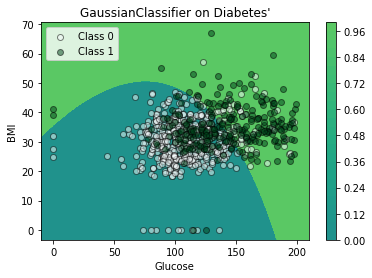

In [21]:
def plot_data(X, y):
    y_unique = np.unique(y)
    colors = pl.cm.BuGn(np.linspace(0.0, 1.0, y_unique.size))
    for this_y, color in zip(y_unique, colors):
        this_X = X[y == this_y]
        pl.scatter(this_X[:, 0], this_X[:, 1],  c=color,
                    alpha=0.5, edgecolor='k',
                    label="Class %s" % this_y)
    pl.legend(loc="best")
    pl.title("GaussianClassifier on Diabetes'")

plot_decision_region(X[:,[1,5]],500)
plot_data(X[:,[1,5]],y)

And now we use the $\texttt{mlxtend.plotting}$ library to use $\texttt{plot_decision_regions}$ function and compare with the results above:

In [22]:
#!pip install mlxtend

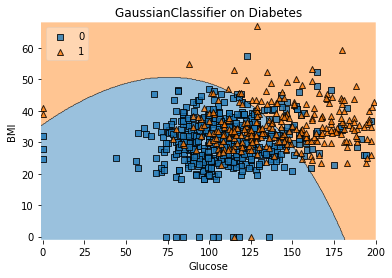

In [23]:
from mlxtend.plotting import plot_decision_regions

plot_decision_regions(X[:,[1,5]], y, clf=clf, legend=2)
plt.xlabel('Glucose')
plt.ylabel('BMI')
plt.title('GaussianClassifier on Diabetes')
plt.show()

Finally, we transform the Gaussian Classifier built above, adding cost functions for the classes and comparing results.

In [24]:
class GaussianClassifier_2:
    '''Minimum Risk - Gaussian Classifier'''
    
    def train(self,X,y):
        
        #class prior
        self.pi_0 = y[y==0].shape[0]/y.shape[0]
        self.pi_1 = 1 - self.pi_0
        
        #class 0 parameters
        self.mean_0 = np.average(X[y==0], axis = 0)
        self.sigma_0 = np.cov(X[y==0], rowvar = False)
        
        #class 1 parameters
        self.mean_1 = np.average(X[y==1], axis = 0)
        self.sigma_1 = np.cov(X[y==1], rowvar = False)
        
        #multivariate class-conditional density function
        self.prob_0 = multivariate_normal(self.mean_0, self.sigma_0, allow_singular = True)
        self.prob_1 = multivariate_normal(self.mean_1, self.sigma_1, allow_singular = True)
        
        print('Mean-parameters: mean_0 = {} \t mean_1 = {}'.format(self.mean_0, self.mean_1))
        print('Sigma-parameters: sigma_0 = {} \t sigma_1 = {}'.format(self.sigma_0[0][0], self.sigma_1[0][0]))
        
    def predict(self,X):
        preds = []
        for x in X:
            risk_c1 = 2*self.prob_1.pdf(x)*self.pi_1 
            risk_c2 = 1*self.prob_0.pdf(x)*self.pi_0
            if (risk_c1 > risk_c2):
                preds.append(1)
            else:
                preds.append(0)
        return np.array(preds)
    
    def posterior_distribution(self,X):
        distri_0 = []
        distri_1 = []
        for x in X:
            post_0 = (self.prob_0.pdf(x)*self.pi_0)/((self.prob_0.pdf(x)*self.pi_0 + self.prob_1.pdf(x)*self.pi_1))
            distri_0.append(post_0)
            post_1 = (self.prob_1.pdf(x)*self.pi_1)/((self.prob_0.pdf(x)*self.pi_0 + self.prob_1.pdf(x)*self.pi_1))
            distri_1.append(post_1)
        plt.scatter(X, distri_0 , color = 'b')
        plt.scatter(X, distri_1 , color = 'r')

In [25]:
clf2 = GaussianClassifier_2()

In [26]:
clf2.train(X_train[:,[1,5]],y_train)
yhat_2 = clf2.predict(X_test[:,[1,5]])
print (classification_report(y_test, yhat_2))

Mean-parameters: mean_0 = [109.73  30.14] 	 mean_1 = [142.38  35.31]
Sigma-parameters: sigma_0 = 636.8419175190186 	 sigma_1 = 1110.7131321716956
              precision    recall  f1-score   support

           0       0.80      0.75      0.77       168
           1       0.56      0.63      0.59        86

    accuracy                           0.71       254
   macro avg       0.68      0.69      0.68       254
weighted avg       0.72      0.71      0.71       254



Normalized confusion matrix
[[0.63 0.37]
 [0.25 0.75]]


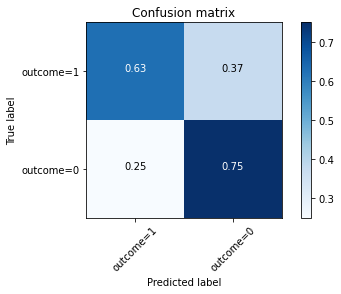

In [30]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat_2, labels=[1,0])
np.set_printoptions(precision=2)


# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['outcome=1','outcome=0'],normalize= True,  title='Confusion matrix')

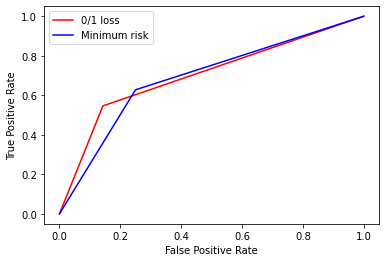

In [28]:
fpr1, tpr1, thresholds1 = metrics.roc_curve(y_test, clf.predict(X_test[:,[1,5]]), pos_label=1)
fpr2, tpr2, thresholds2 = metrics.roc_curve(y_test, clf2.predict(X_test[:,[1,5]]), pos_label=1)

plt.plot(fpr1,tpr1, color = 'r')
plt.plot(fpr2,tpr2, color = 'b')
plt.legend(['0/1 loss', 'Minimum risk'])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()